In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
for column in df.columns:
    if column in ['lead_time','arrival_date_week_number','arrival_date_day_of_month','country','agent','company','days_in_waiting_list'
                  ,'adr','reservation_status_date','previous_bookings_not_canceled']:
        pass
    else:   
        print(df[column].value_counts(),'\n')

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64 

is_canceled
0    75166
1    44224
Name: count, dtype: int64 

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64 

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64 

stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
19        1
18        1
Name: count, dtype: int64 

stays_in_week_nights
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16  

In [7]:

# changing the data-type of children column from float to int.
df['children'] = df['children'].fillna(0).astype(int)

In [8]:
# lets see if there are records with no. of adults = 0 AND no. of children = 0. They will need to be removed
# as they are clearly data entry errors.
df = df[~((df['adults'] == 0) & (df['children'] == 0))]
len(df)

119210

In [9]:
# found 2 extreme values in adr (-6.38 & 5400). We'll remove them because adr cannot be negative and 5400 is unusally high.
df = df[~((df['adr']<0) | (df['adr']==5400))]
len(df)

119208

In [10]:
# creating a new feature total_days_stayed 
df['total_days_stayed'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

### Understanding columns' distributions

In [11]:
# boxplots for numeric columns and countplots for binary and categorical columns.
numerical_columns = ["lead_time","adr","total_days_stayed"]
cols_to_exclude = ["lead_time","adr","reservation_status_date","arrival_date_week_number","country","previous_bookings_not_canceled"
                   ,"agent","company","days_in_waiting_list","total_days_stayed"]
categorical_and_binary_columns = df.drop(columns=cols_to_exclude,inplace=False).columns

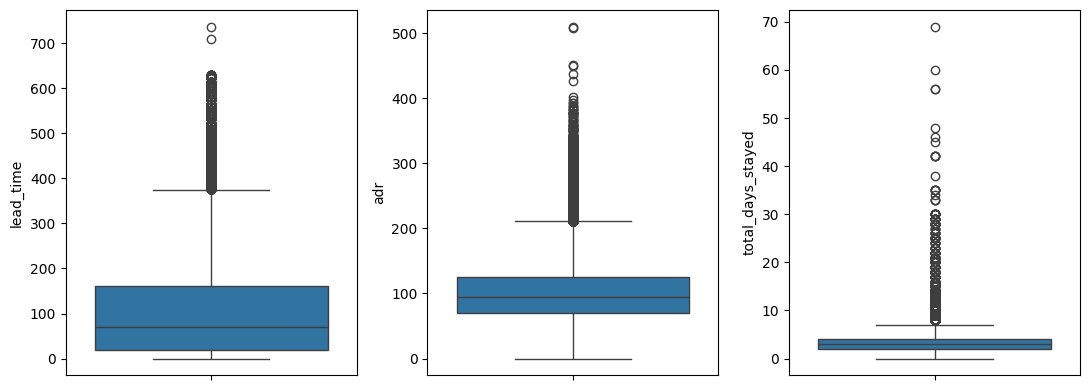

In [12]:
# boxplots will be a better visual than histogram for continuous values here because of skewed distributions.
plt.figure(figsize=(11,4))
for i, column in enumerate(numerical_columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[column])
plt.tight_layout()
plt.show()

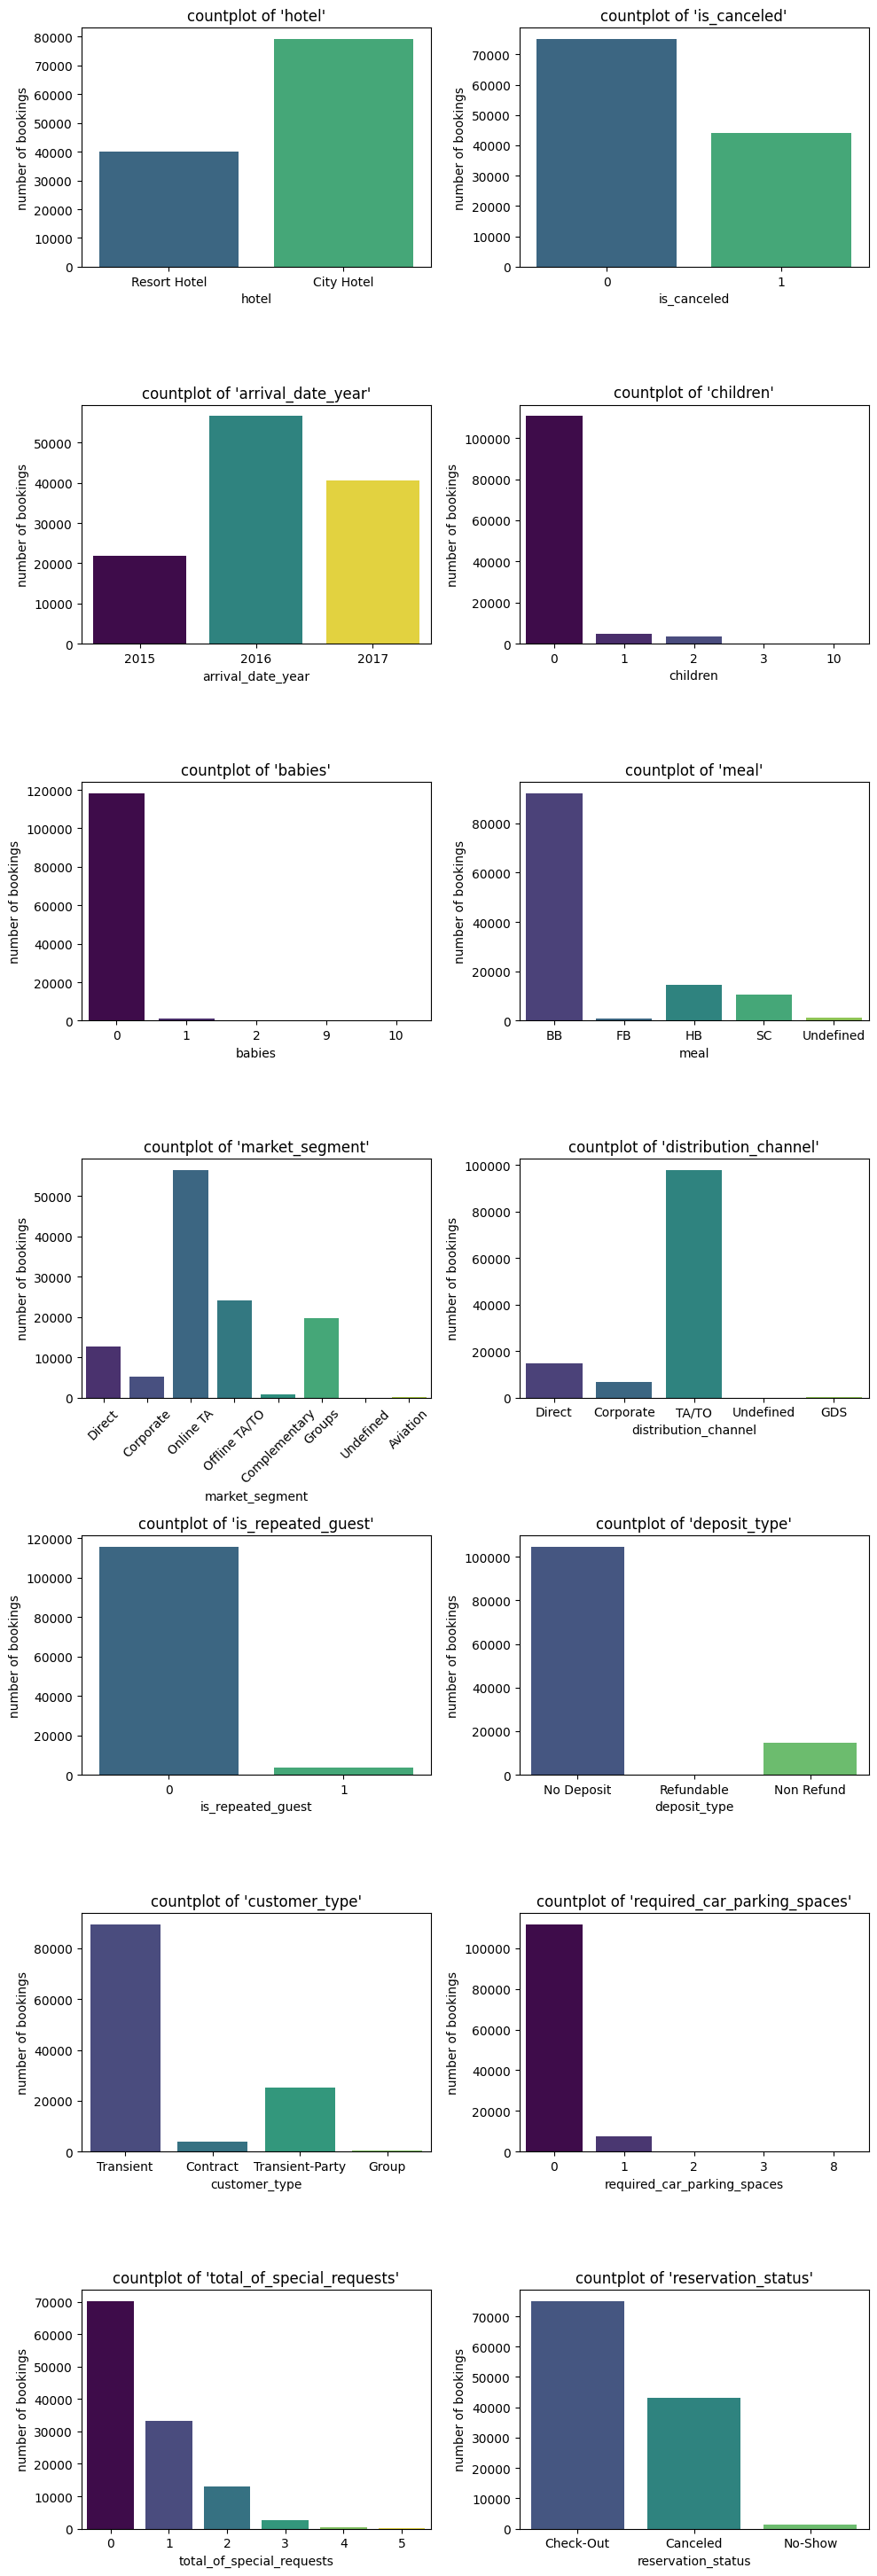

In [13]:
few_categories_cols = []
more_categories_cols = []
for column in categorical_and_binary_columns:
    if df[column].nunique() < 9:
        few_categories_cols.append(column)
    else:
        more_categories_cols.append(column)

plt.figure(figsize=(10,50))
for i,column in enumerate(few_categories_cols):
    plt.subplot(12,2,i+1)
    sns.countplot(x=df[column],hue=df[column],palette='viridis',legend=False)
    plt.title(f"countplot of '{column}'")
    plt.ylabel('number of bookings')
    if df[column].nunique()>6:
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


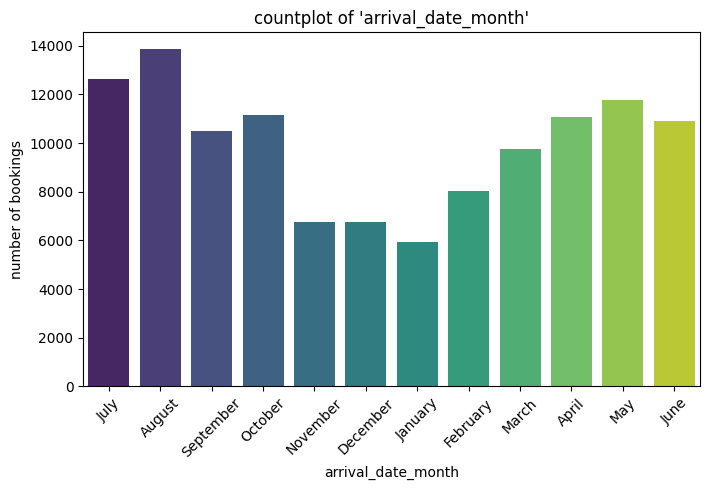

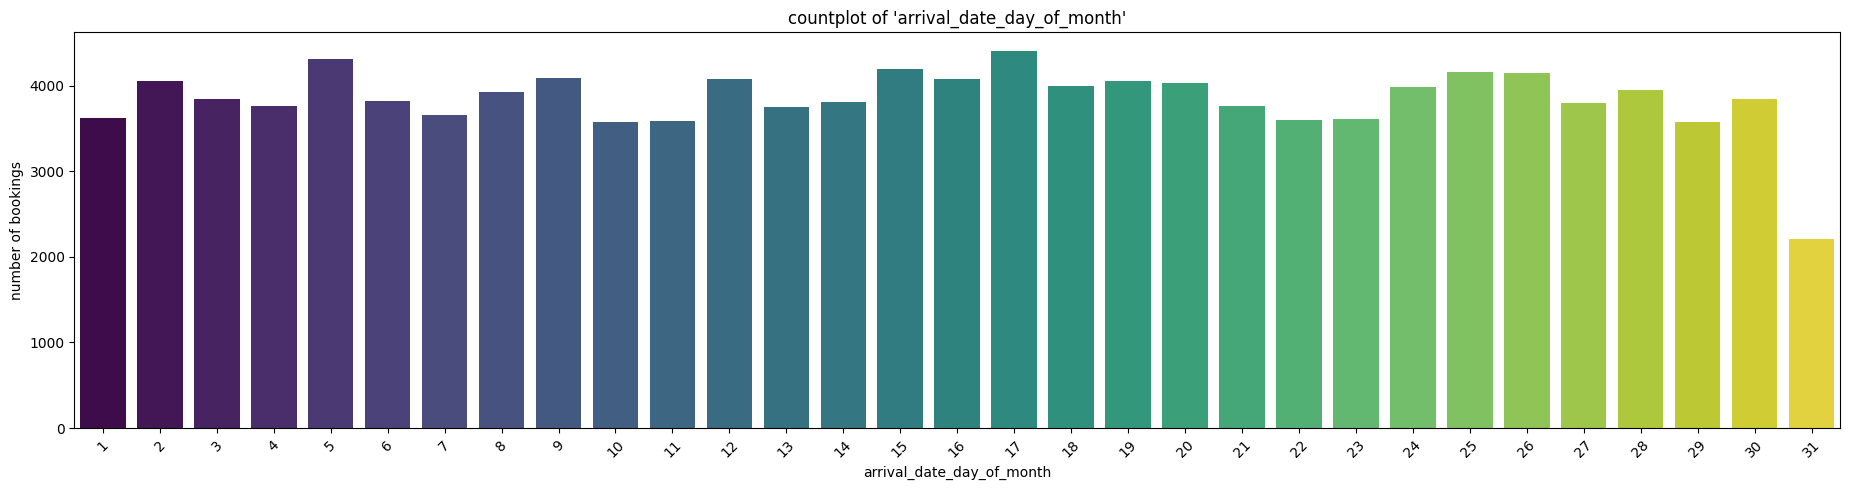

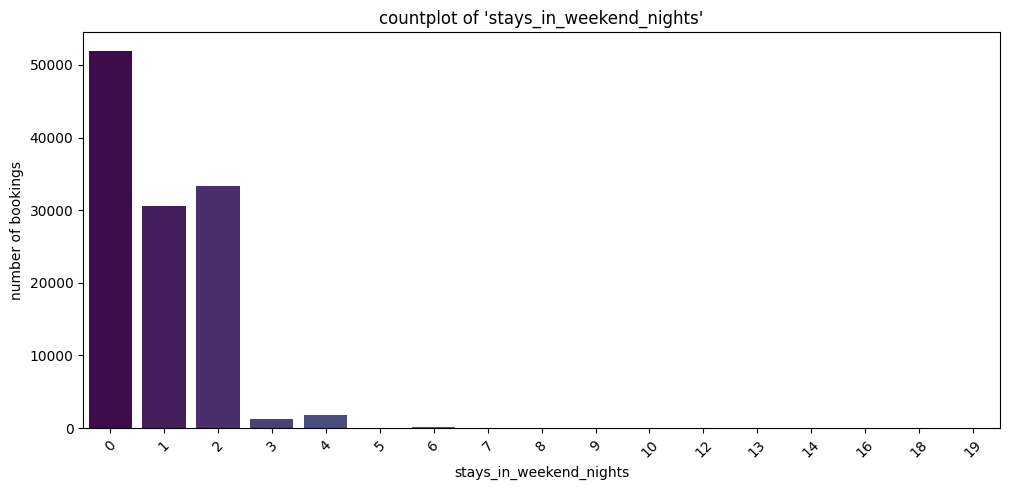

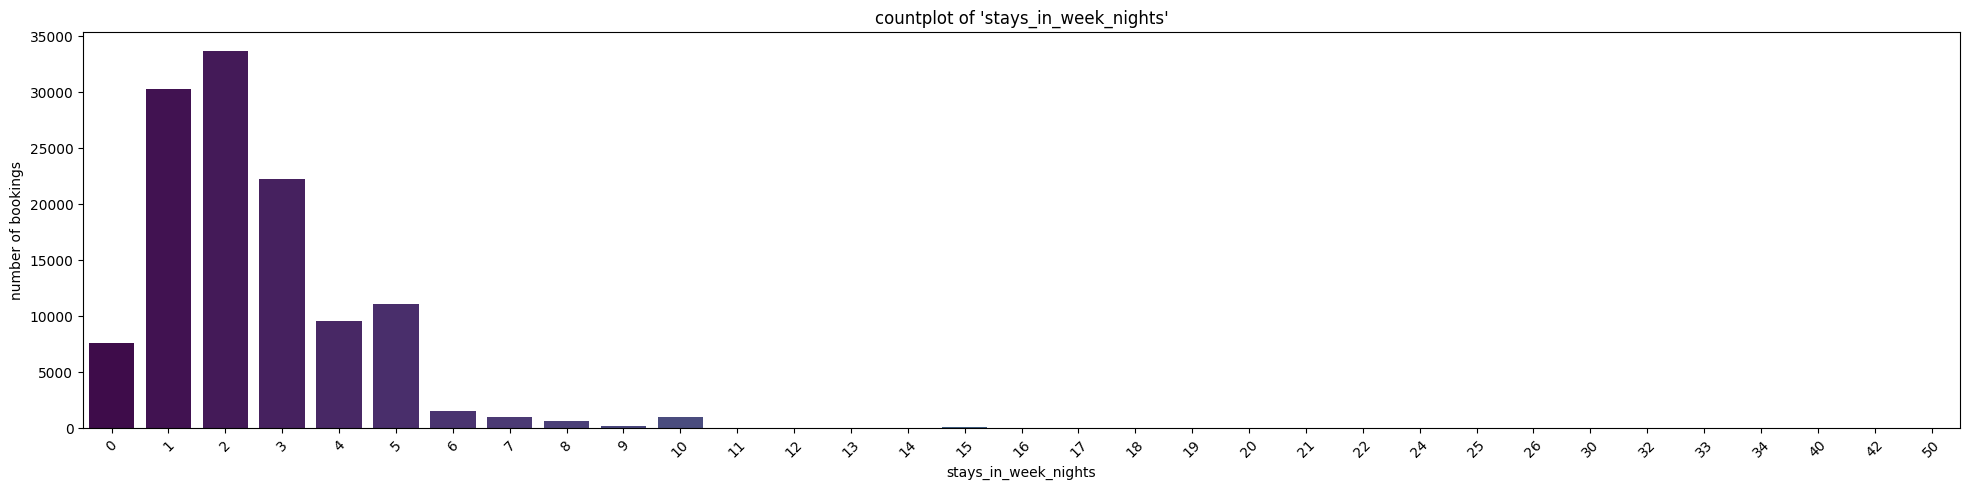

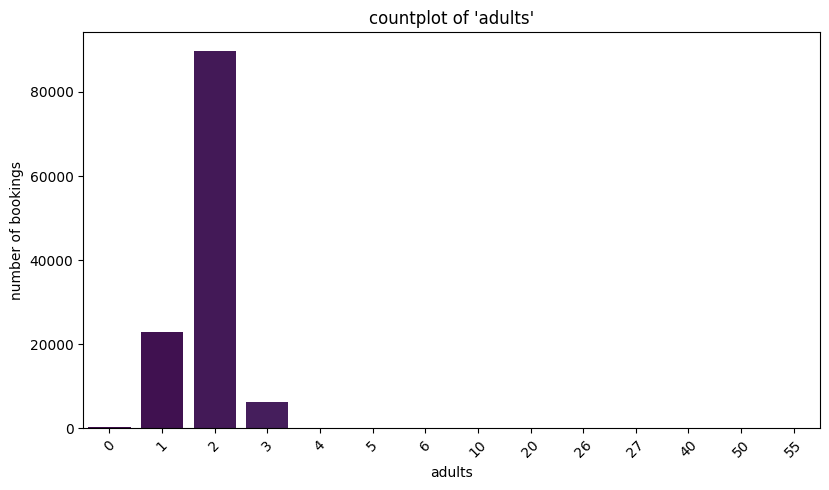

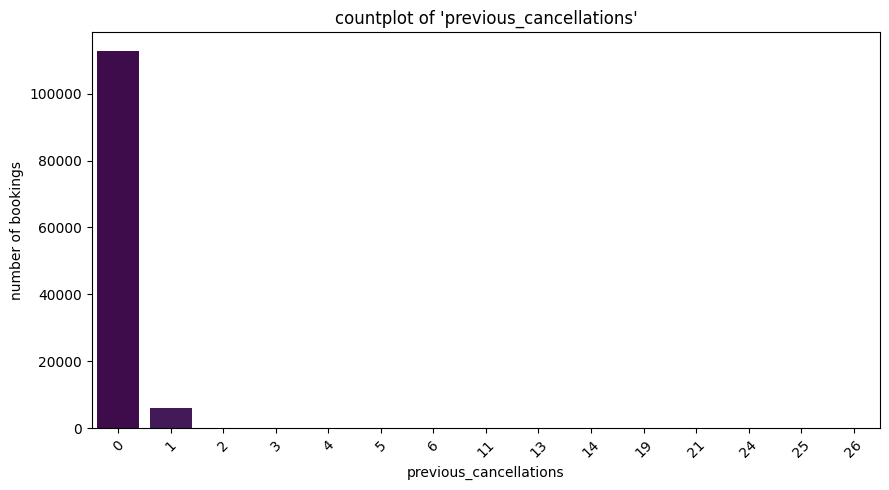

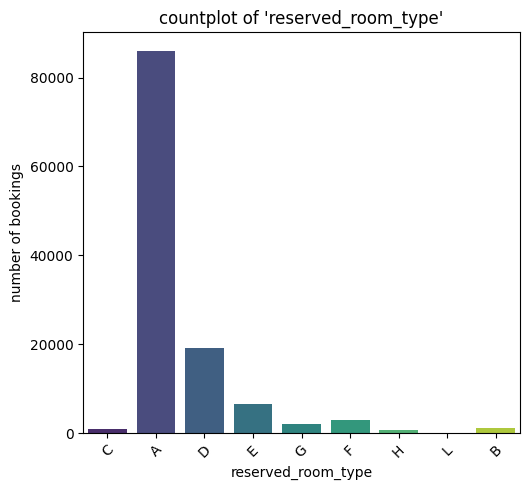

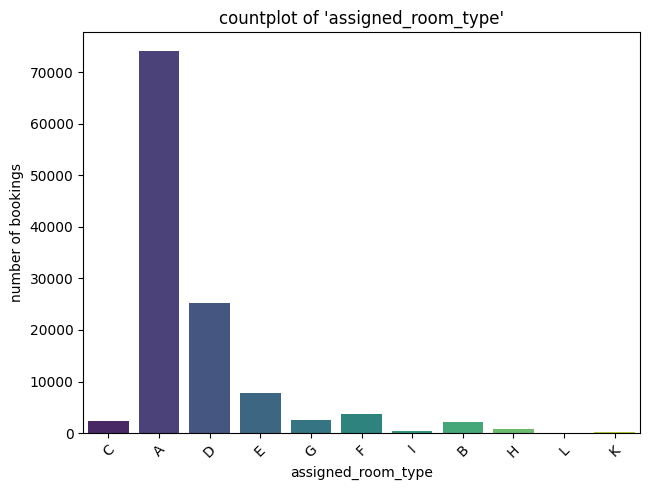

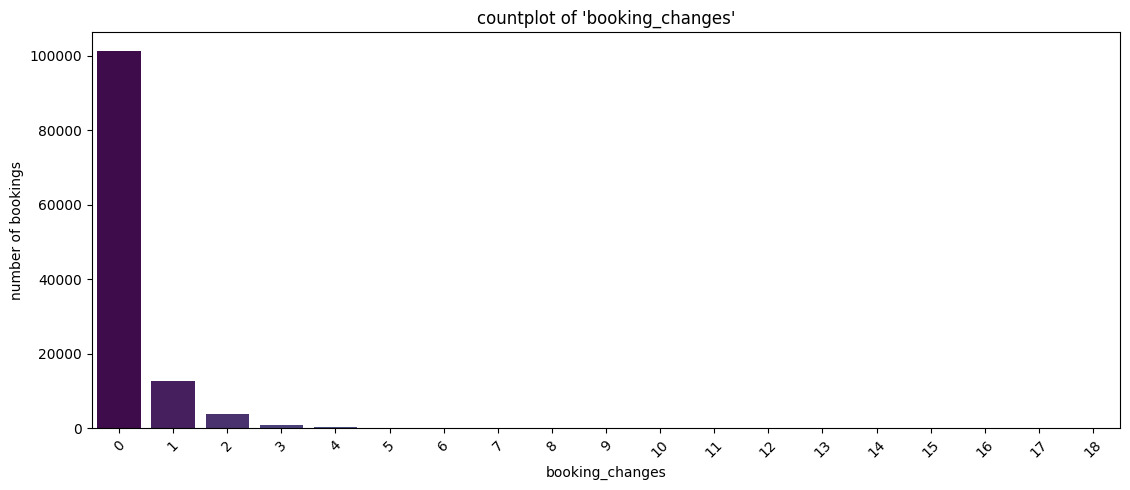

In [14]:
for column in more_categories_cols:
    num_categories = df[column].nunique()
    fig_width = max(4, num_categories * 0.6)  # adjust multiplier to control width
    plt.figure(figsize=(fig_width, 5))  # set individual plot size
    sns.countplot(x=df[column],hue=df[column],palette='viridis',legend=False)
    plt.title(f"countplot of '{column}'")
    plt.ylabel('number of bookings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Time based trends

#### How do hotel bookings vary across different months of the year?

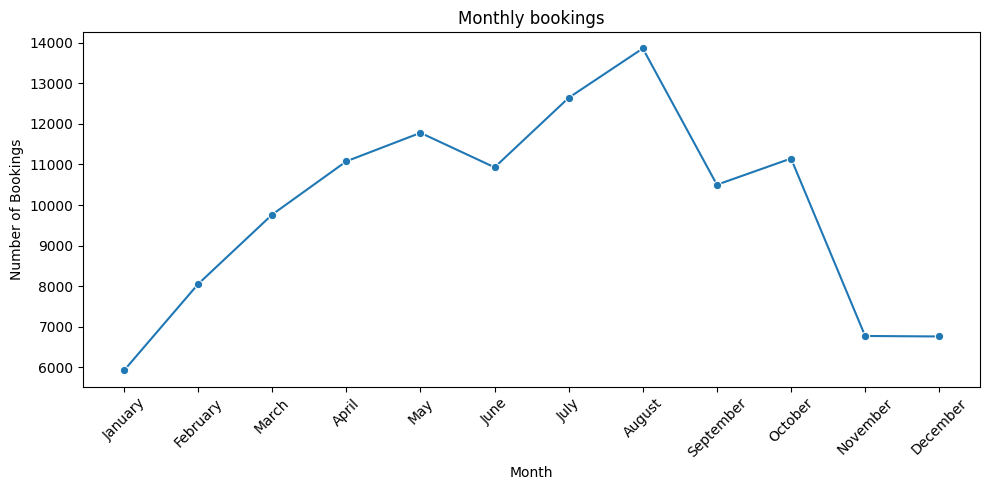

In [15]:
df_copy = df.copy()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_copy['arrival_date_month'] = pd.Categorical(df_copy['arrival_date_month'], categories=month_order, ordered=True)

monthly_bookings = df_copy.groupby('arrival_date_month',observed=False).size().reset_index(name='bookings')
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_bookings,x='arrival_date_month',y='bookings',marker='o')
plt.title('Monthly bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


There is a clear seasonality in bookings, with peaks in summer months (e.g., July and August) and drops during winter months.

#### What are the cancellation trends over time?

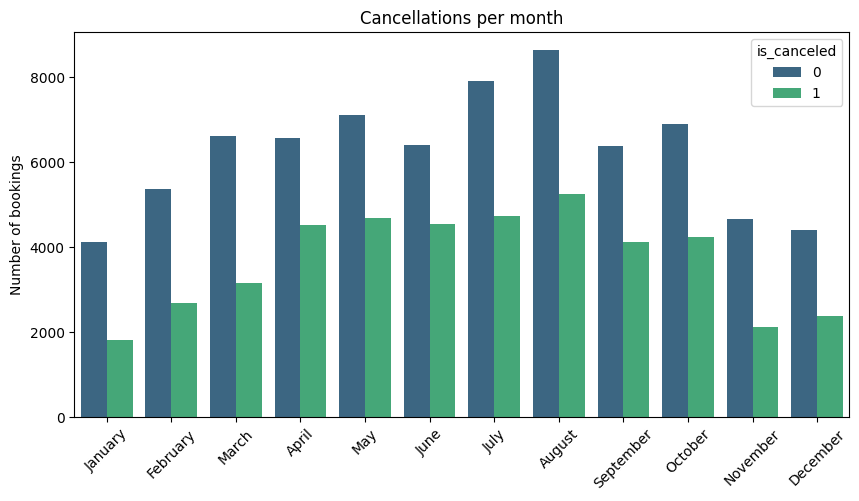

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_copy,x='arrival_date_month',hue='is_canceled',palette='viridis')
plt.title('Cancellations per month')
plt.xlabel('')
plt.ylabel('Number of bookings')
plt.xticks(rotation=45)
plt.show()

Cancellations tend to rise during months with higher bookings, indicating a potential link between volume and volatility.

#### How do monthly bookings vary between City and Resort hotels?

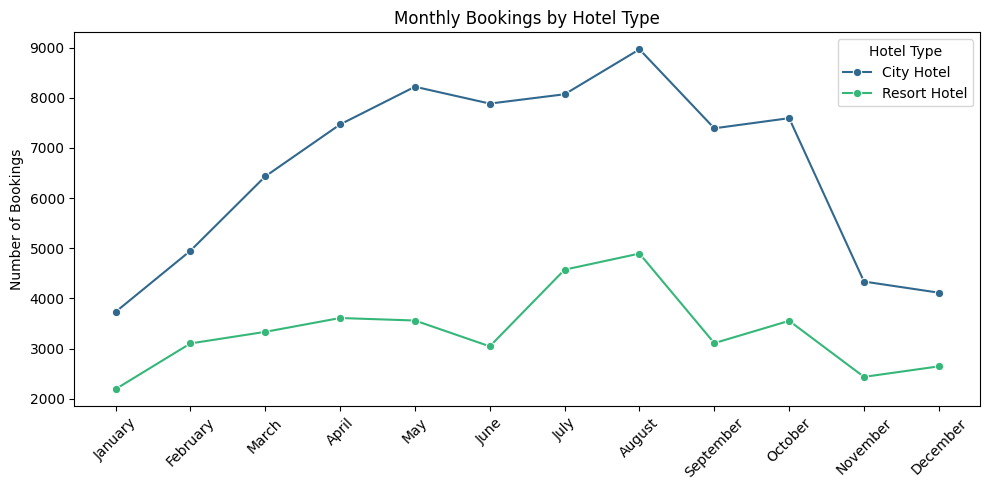

In [17]:
monthly_bookings_hotel_type = df_copy.groupby(['hotel', 'arrival_date_month'],observed=False).size().reset_index(name='bookings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_bookings_hotel_type, x='arrival_date_month', y='bookings', hue='hotel', marker='o',palette='viridis')
plt.title('Monthly Bookings by Hotel Type')
plt.xlabel('')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

City hotels consistently receive more bookings than resort hotels throughout the year. Bookings peak in August for both types.

#### How do monthly cancellations differ between City and Resort hotels?

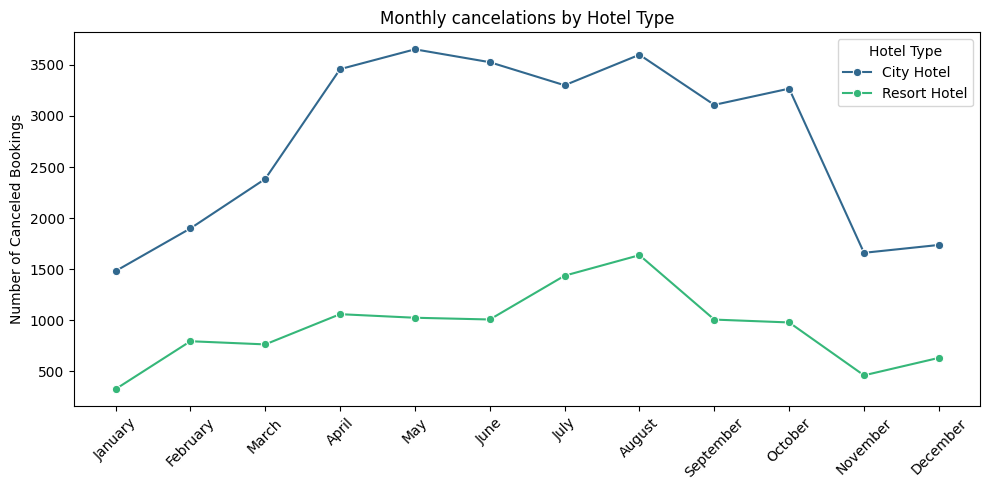

In [18]:
monthly_bookings_hotel_type_canceled = df_copy[df_copy['is_canceled']==1].groupby(['hotel', 'arrival_date_month'],observed=False).size().reset_index(name='bookings')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_bookings_hotel_type_canceled, x='arrival_date_month', y='bookings', hue='hotel', marker='o',palette='viridis')
plt.title('Monthly cancelations by Hotel Type')
plt.xlabel('')
plt.ylabel('Number of Canceled Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

City hotels have a significantly higher number of cancellations compared to resort hotels across all months. Cancellations for both hotel types peak in May and August, aligning with high booking months.

#### How does the Average Daily Rate (ADR) change throughout the year?

Text(0.5, 0, '')

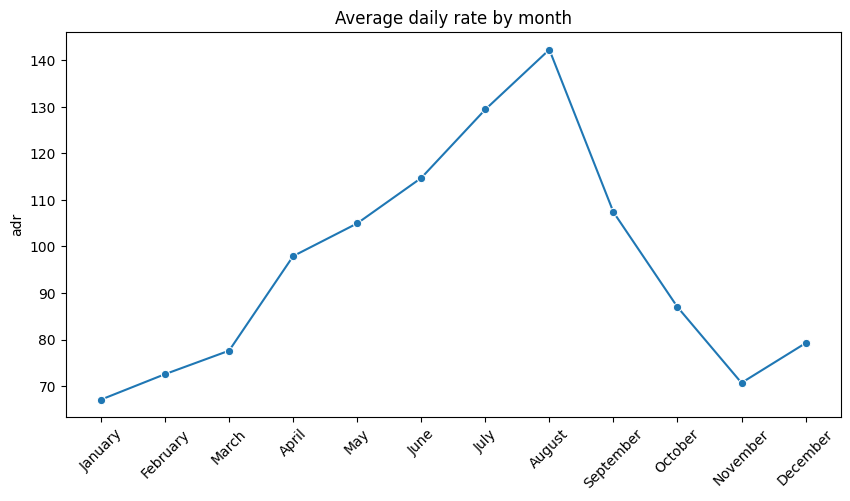

In [19]:
adr_df = df_copy[df_copy['is_canceled']==0].groupby('arrival_date_month',observed=False)['adr'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=adr_df,x='arrival_date_month',y='adr',marker='o')
plt.title('Average daily rate by month')
plt.xticks(rotation=45)
plt.xlabel('')

ADR increases in peak seasons (typically summer) and drops in off-peak months.

#### What is the average daily rate across hotel types and months?

Text(0.5, 0, '')

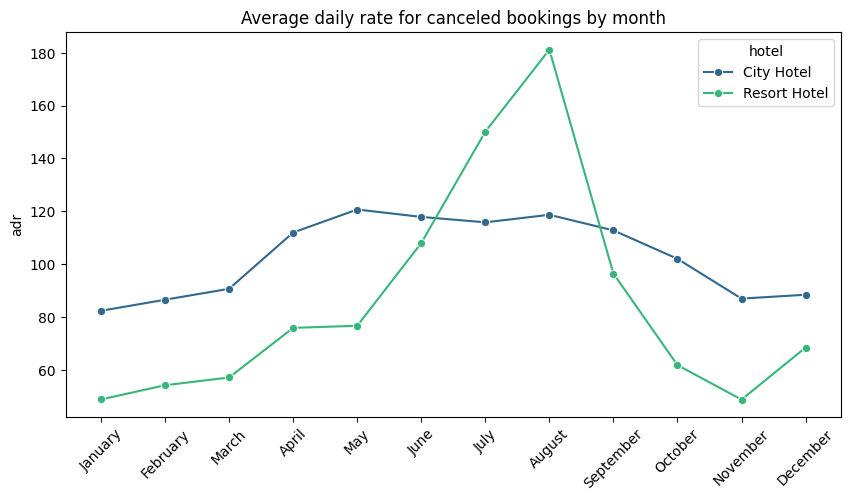

In [20]:
adr_df_hotel = df_copy[df_copy['is_canceled']==0].groupby(['arrival_date_month','hotel'],observed=False)['adr'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=adr_df_hotel,x='arrival_date_month',y='adr',hue='hotel',marker='o',palette='viridis')
plt.title('Average daily rate for canceled bookings by month')
plt.xticks(rotation=45)
plt.xlabel('')

Resort hotels often charge more during holidays or school vacations, while city hotels may have more consistent pricing with smaller spikes.

#### What is the average daily rate for canceled bookings across hotel types and months?

Text(0.5, 0, '')

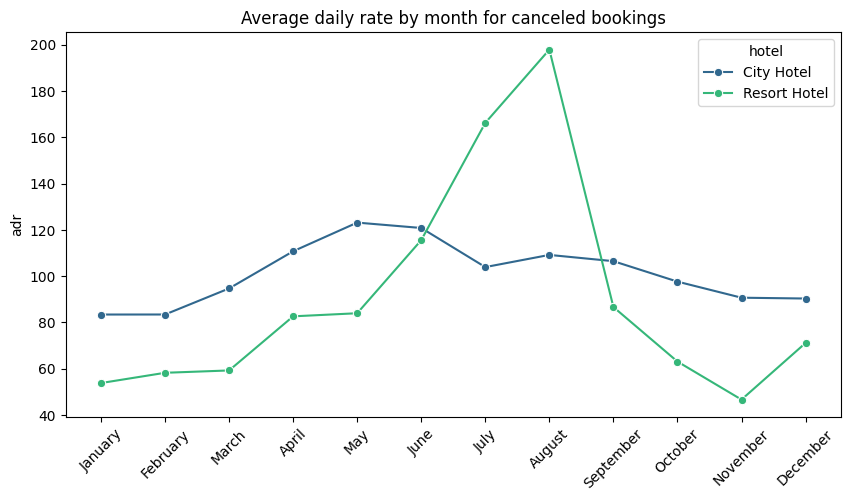

In [21]:
# adr for monthly canceled bookings. Revenue lost from cancellations.
adr_df_hotel_canceled = df_copy[df_copy['is_canceled']==1].groupby(['arrival_date_month','hotel'],observed=False)['adr'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=adr_df_hotel_canceled,x='arrival_date_month',y='adr',hue='hotel',marker='o',palette='viridis')
plt.title('Average daily rate by month for canceled bookings')
plt.xticks(rotation=45)
plt.xlabel('')

We can see that Resort hotels show a sharp spike in ADR for canceled bookings during July and August

#### How does the average stay duration change throughout the year?

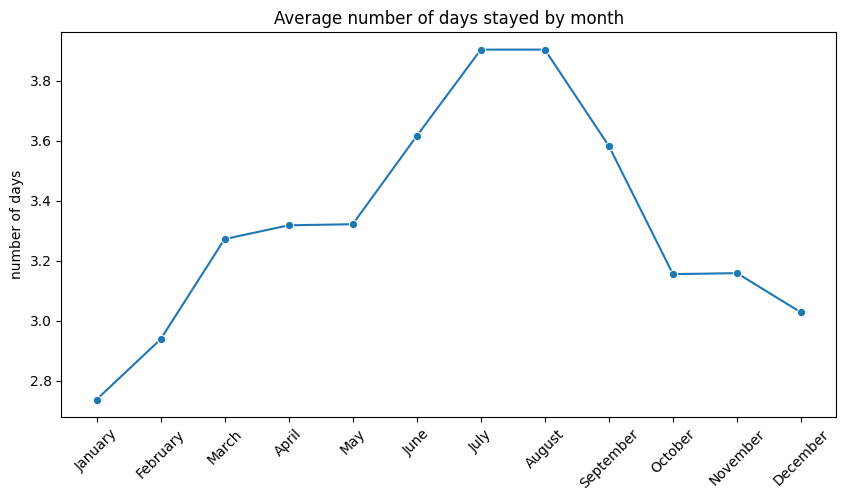

In [22]:
avg_stay = df_copy[df_copy['is_canceled']==0].groupby('arrival_date_month',observed=False)['total_days_stayed'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_stay,x='arrival_date_month',y='total_days_stayed',marker='o')
plt.title('Average number of days stayed by month')
plt.xlabel('')
plt.ylabel('number of days')
plt.xticks(rotation=45)
plt.show()


The average length of stay gradually increases from January and peaks in July and August. It then declines toward the end of the year.


#### How does average stay duration differ between City and Resort hotels each month?

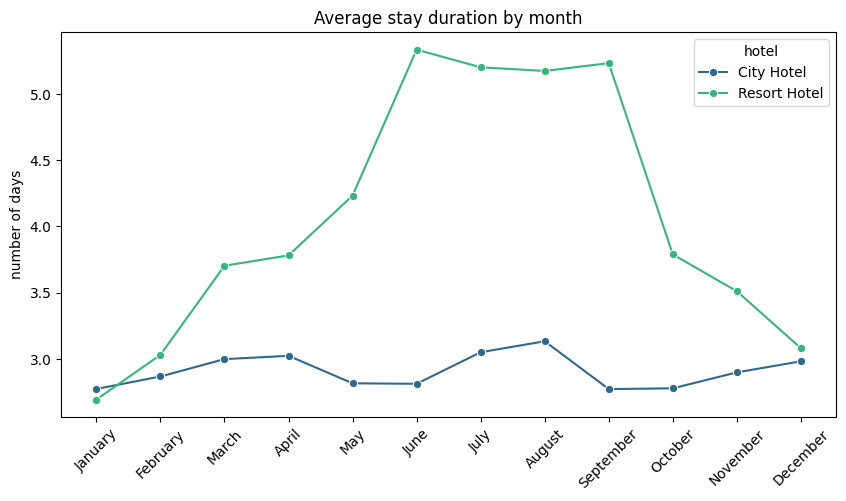

In [23]:
avg_stay_hotel = df_copy[df_copy['is_canceled']==0].groupby(['arrival_date_month','hotel'],observed=False)['total_days_stayed'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_stay_hotel,x='arrival_date_month',y='total_days_stayed',marker='o',hue='hotel',palette='viridis')
plt.title('Average stay duration by month')
plt.xlabel('')
plt.ylabel('number of days')
plt.xticks(rotation=45)
plt.show()


Resort hotels have notably longer average stays than City hotels, especially during the summer months (June–September), Whereas, City hotels remain fairly stable throughout the year.
